# Introdução a Classificação

## Primeiro modelo usando LinearSVC

In [4]:
# features [1 sim, 0 não]
# pelo longo?
# perna curta?
# faz auau?

porco1 = [0, 1, 0]
porco2 = [0, 1, 1]
porco3 = [1, 1, 0]

cachorro1 = [0, 1, 1]
cachorro2 = [1, 0, 1]  
cachorro3 = [1, 1, 1]

dados = [porco1, porco2, porco3, cachorro1, cachorro2, cachorro3]
classes = [1, 1, 1, 0, 0, 0] # 1 = porco, 0 = cachorro

In [5]:
from sklearn.svm import LinearSVC

modelo = LinearSVC()
modelo.fit(dados, classes)

LinearSVC()

In [6]:
animal_misterioso = [1, 1, 1]
modelo.predict([animal_misterioso])

array([0])

In [7]:
misterio1 = [1, 1, 1]
misterio2 = [1, 1, 0]
misterio3 = [0, 1, 1]

testes = [misterio1, misterio2, misterio3]
previsoes = modelo.predict(testes)

In [8]:
testes_classes = [0, 1, 1]

In [9]:
corretos = (previsoes == testes_classes).sum() # acertos
total = len(testes)
taxa_de_acerto = corretos / total * 100
print("Taxa de acerto %.2f" % taxa_de_acerto)

Taxa de acerto 66.67


## Padronização de nomes

In [10]:
from sklearn.metrics import accuracy_score

taxa_de_acerto = accuracy_score(testes_classes, previsoes) * 100
print(f"Acurácia: {taxa_de_acerto:.2f}%")

Acurácia: 66.67%


In [11]:
# convertendo as váriaveis para treino e teste
treino_x = [porco1, porco2, porco3, cachorro1, cachorro2, cachorro3]
treino_y = [1, 1, 1, 0, 0, 0]

modelo.fit(treino_x, treino_y)

teste_x = [misterio1, misterio2, misterio3]
teste_y = [0, 1, 1]
previsoes = modelo.predict(teste_x)

In [12]:
corretos = (previsoes == teste_y).sum() # acertos
total = len(teste_x)
taxa_de_acerto = corretos / total * 100
print("Taxa de acerto %.2f" % taxa_de_acerto)

Taxa de acerto 66.67


# Testes replicáveis, estratificação e lendo dados da internet

## Lendo arquivos da internet e manipulando

In [13]:
uri = 'https://gist.githubusercontent.com/guilhermesilveira/b9dd8e4b62b9e22ebcb9c8e89c271de4/raw/c69ec4b708fba03c445397b6a361db4345c83d7a/tracking.csv' 

In [14]:
import pandas as pd

In [15]:
dados = pd.read_csv(uri)
dados.head()

inicial  palestras  contato  comprou  patrocinio
0        1          1        0        0           0
1        1          1        0        0           0
2        1          1        0        0           0
3        1          1        0        0           0
4        1          1        0        0           0

In [16]:
y = dados['comprou']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: comprou, dtype: int64

In [17]:
x = dados[['inicial', 'palestras', 'contato', 'patrocinio']]
x.head()

inicial  palestras  contato  patrocinio
0        1          1        0           0
1        1          1        0           0
2        1          1        0           0
3        1          1        0           0
4        1          1        0           0

In [18]:
treino_x = x[:75]
treino_y = y[:75]

teste_x = x[75:]
teste_y = y[75:]

modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
acuracia

95.83333333333334

### OU

In [19]:
# dividindo os dados em treino e teste para evitar overfitting
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

modelo = LinearSVC()

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, random_state=563)

modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
acuracia

96.0

## Estratificando splits

In [20]:
modelo = LinearSVC()

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, random_state=563, stratify=y)

modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
acuracia

100.0

In [21]:
# vendo os valores de treino
treino_y.value_counts()

comprou
0    49
1    25
Name: count, dtype: int64

In [22]:
# vendo os valores de teste
teste_y.value_counts()

comprou
0    17
1     8
Name: count, dtype: int64

# Um projeto de baixa dimensionalidade e o baseline

In [23]:
uri_projetos = "https://gist.githubusercontent.com/guilhermesilveira/12291c548acaf544596795709020e3db/raw/325bdef098bd9cbc2189215b7e32e22f437f29f3/projetos.csv"

In [24]:
dados_projeto = pd.read_csv(uri_projetos)
dados_projeto.head()

nao_finalizado  horas_esperadas         preco
0               0             75.0   6985.000000
1               1              0.0   4325.293458
2               0             87.0  14205.000000
3               1             13.0    100.000000
4               0              2.0    202.000000

In [25]:
# mapeando uma nova coluna com os numeros invertidos
dados_projeto['finalizado'] = dados_projeto['nao_finalizado'].map({1:0, 0:1})
dados_projeto.head()

nao_finalizado  horas_esperadas         preco  finalizado
0               0             75.0   6985.000000           1
1               1              0.0   4325.293458           0
2               0             87.0  14205.000000           1
3               1             13.0    100.000000           0
4               0              2.0    202.000000           1

<Axes: xlabel='horas_esperadas', ylabel='preco'>

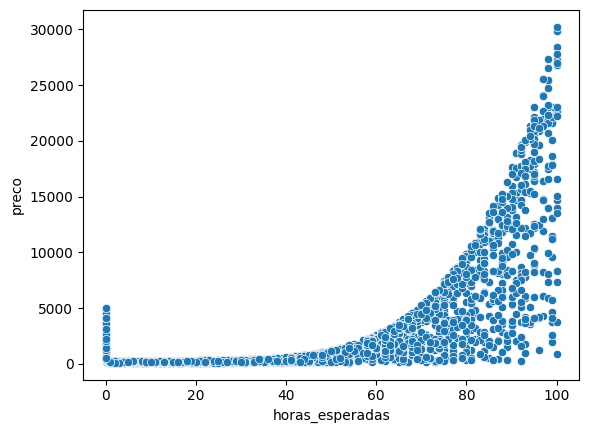

In [26]:
import seaborn as sns

sns.scatterplot(x='horas_esperadas', y='preco', data=dados_projeto)

<Axes: xlabel='horas_esperadas', ylabel='preco'>

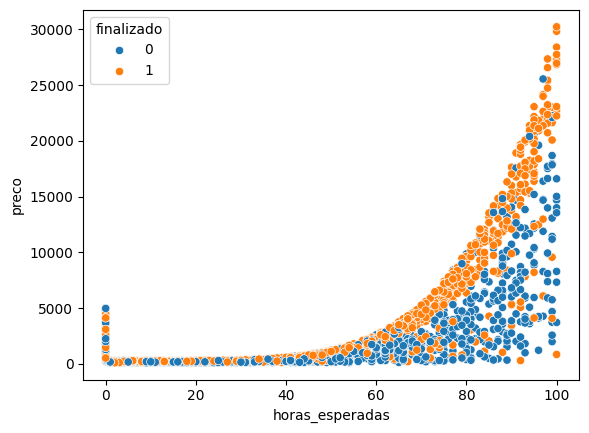

In [27]:
# colorindo com os dados da coluna finalizado
sns.scatterplot(x='horas_esperadas', y='preco', data=dados_projeto, hue='finalizado')

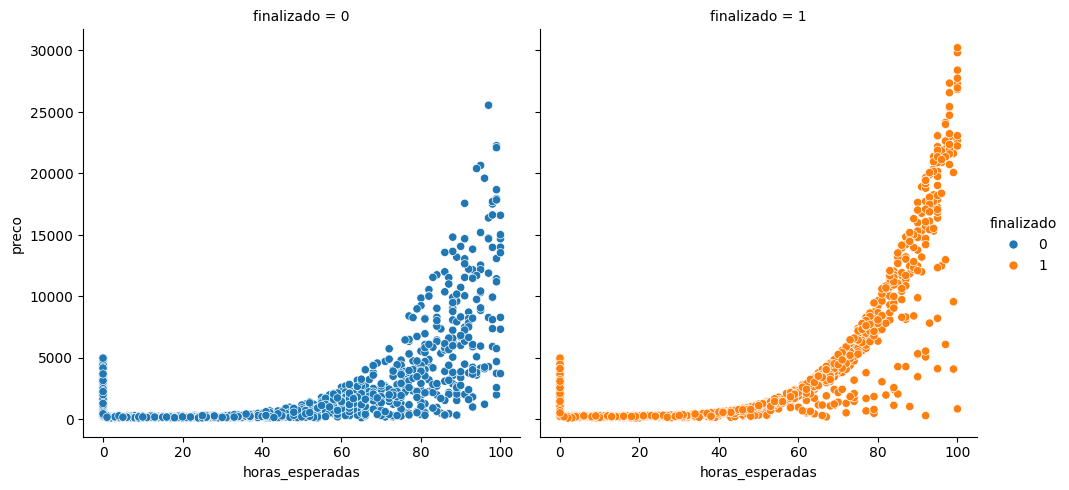

In [28]:
sns.relplot(x='horas_esperadas', y='preco', data=dados_projeto, hue='finalizado', col='finalizado')

In [29]:
# jogando fora as linhas com horas esperadas = 0
dados_projeto = dados_projeto.query('horas_esperadas > 0')
dados_projeto.head()

nao_finalizado  horas_esperadas    preco  finalizado
0               0             75.0   6985.0           1
2               0             87.0  14205.0           1
3               1             13.0    100.0           0
4               0              2.0    202.0           1
5               0             49.0   1096.0           1

In [30]:
x = dados_projeto[['horas_esperadas', 'preco']]
y = dados_projeto['finalizado']

In [31]:
modelo = LinearSVC()

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, random_state=563, stratify=y)

modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
acuracia

55.18518518518518

In [32]:
previsoes_de_base = teste_y.sum() / len(teste_y)
previsoes_de_base

0.5259259259259259

## Curva de Decisão

In [33]:
x_min = teste_x['horas_esperadas'].min()
x_max = teste_x['horas_esperadas'].max()
y_min = teste_x['preco'].min()
y_max = teste_x['preco'].max()
print(x_min, x_max, y_min, y_max)

1.0 100.0 100.0 27738.0


In [34]:
import numpy as np

pixels = 100

eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)
#print(eixo_y)
#print(eixo_y)

In [35]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.746162e+04],
       [9.802000e+01, 2.746162e+04],
       [9.901000e+01, 2.746162e+04]])

In [36]:
z = modelo.predict(pontos)
z = z.reshape(xx.shape)
z

c:\Users\pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

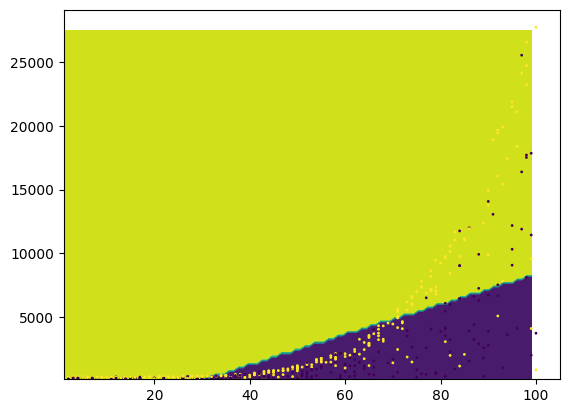

In [37]:
# com o gráfico vemos que o modelo não é bom para prever os dados, pois é linear
import matplotlib.pyplot as plt

plt.contourf(xx, yy, z)
plt.scatter(teste_x['horas_esperadas'], teste_x['preco'], c=teste_y, s=1)

# Support Vector Machine e a não linearidade

In [38]:
from sklearn.svm import SVC

# parametro gamma='auto'
modelo = SVC(gamma='auto')

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, random_state=563, stratify=y)

modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
acuracia

58.7037037037037

c:\Users\pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


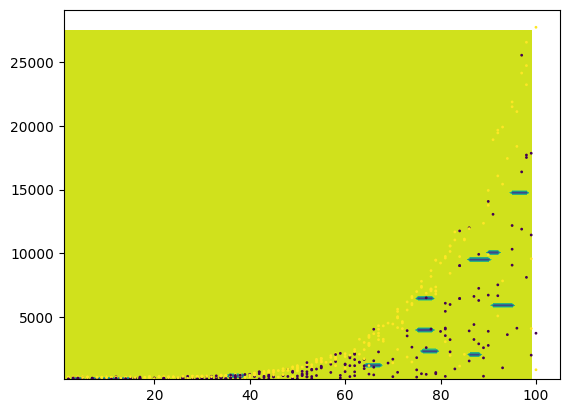

In [39]:
# calculando a curva de decisão do modelo
x_min = teste_x['horas_esperadas'].min()
x_max = teste_x['horas_esperadas'].max()
y_min = teste_x['preco'].min()
y_max = teste_x['preco'].max()

pixels = 100

eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

z = modelo.predict(pontos)
z = z.reshape(xx.shape)

plt.contourf(xx, yy, z)
plt.scatter(teste_x['horas_esperadas'], teste_x['preco'], c=teste_y, s=1)

In [40]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# parametro gamma='auto'
modelo = SVC(gamma='auto')

raw_treino_x, raw_teste_x, raw_treino_y, raw_teste_y = train_test_split(x, y, test_size=0.25, random_state=563, stratify=y)

scaler = StandardScaler()
scaler.fit(raw_treino_x)

treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
acuracia

66.85185185185185

In [41]:
teste_x

array([[-0.90611966, -0.59643341],
       [-1.21855029, -0.58757745],
       [ 0.69074798, -0.16268358],
       ...,
       [-0.48954549, -0.57872148],
       [-0.90611966, -0.60355669],
       [-0.87140515, -0.56890291]])

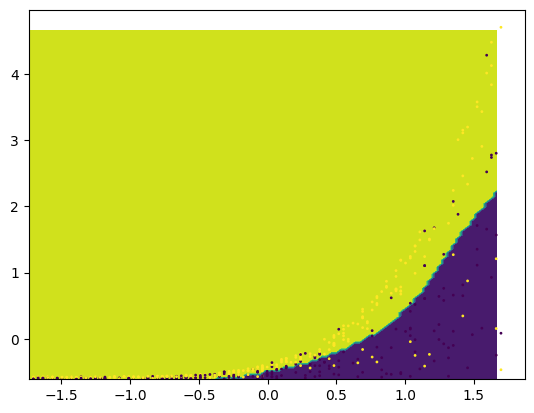

In [42]:
# separando as colunas do teste_x, substituindo o ['horas_esperadas', 'preco'] por teste_x[:, 0] e teste_x[:, 1]
data_col1 = teste_x[:, 0]
data_col2 = teste_x[:, 1]

x_min = data_col1.min()
x_max = data_col1.max()
y_min = data_col2.min()
y_max = data_col2.max()

pixels = 100

eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

z = modelo.predict(pontos)
z = z.reshape(xx.shape)

plt.contourf(xx, yy, z)
plt.scatter(data_col1, data_col2, c=teste_y, s=1)

# DummyClassifiers e árvore de decisão

#### Começando um novo projeto

In [43]:
dados = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/dd7ba8142321c2c8aaa0ddd6c8862fcc/raw/e694a9b43bae4d52b6c990a5654a193c3f870750/precos.csv")
dados.head()

milhas_por_ano  ano_do_modelo      preco  vendido
0           21801           2000   30941.02        1
1            7843           1998   40557.96        1
2            7109           2006   89627.50        0
3           26823           2015   95276.14        0
4            7935           2014  117384.68        1

In [44]:
dados["km_por_ano"] = dados["milhas_por_ano"] * 1.60934
dados.head()

milhas_por_ano  ano_do_modelo      preco  vendido   km_por_ano
0           21801           2000   30941.02        1  35085.22134
1            7843           1998   40557.96        1  12622.05362
2            7109           2006   89627.50        0  11440.79806
3           26823           2015   95276.14        0  43167.32682
4            7935           2014  117384.68        1  12770.11290

In [45]:
# criando uma nova coluna de idade com base no ano do modelo
from datetime import datetime

dados["idade"] = datetime.today().year - dados["ano_do_modelo"]
dados.head()

milhas_por_ano  ano_do_modelo      preco  vendido   km_por_ano  idade
0           21801           2000   30941.02        1  35085.22134     25
1            7843           1998   40557.96        1  12622.05362     27
2            7109           2006   89627.50        0  11440.79806     19
3           26823           2015   95276.14        0  43167.32682     10
4            7935           2014  117384.68        1  12770.11290     11

In [46]:
# dropando "milhas_por_ano" e "ano_do_modelo" porque não serão utilizadas
dados.drop(["milhas_por_ano", "ano_do_modelo"], axis=1, inplace=True)
dados.head()

preco  vendido   km_por_ano  idade
0   30941.02        1  35085.22134     25
1   40557.96        1  12622.05362     27
2   89627.50        0  11440.79806     19
3   95276.14        0  43167.32682     10
4  117384.68        1  12770.11290     11

In [47]:
# variáveis de treino e teste
x = dados[["preco", "idade", "km_por_ano"]]
y = dados["vendido"]

In [48]:
len(dados.query("vendido == True")) / len(dados)

0.58

##### LinearSVC

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

SEED = 563

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED,
                                                         stratify = y)
print(f"Treinaremos com {len(raw_treino_x)}")
print(f"Testaremos com {len(raw_teste_x)}")


scaler = StandardScaler()
scaler.fit(raw_treino_x)

treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)


modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")

Treinaremos com 7500
Testaremos com 2500
A acurácia foi de 70.68%


##### SVC

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

SEED = 563

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED,
                                                         stratify = y)
print(f"Treinaremos com {len(raw_treino_x)}")
print(f"Testaremos com {len(raw_teste_x)}")


scaler = StandardScaler()
scaler.fit(raw_treino_x)

treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)


modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")

Treinaremos com 7500
Testaremos com 2500
A acurácia foi de 77.20%


##### DummyClassifier

In [51]:
from sklearn.dummy import DummyClassifier

SEED = 563

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED,
                                                         stratify = y)
print(f"Treinaremos com {len(raw_treino_x)}")
print(f"Testaremos com {len(raw_teste_x)}")

# por padrão utiliza a estratégia de classificação mais frequente
classificador = DummyClassifier()
classificador.fit(raw_treino_x, treino_y)
previsoes = classificador.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia do dummy foi de {acuracia:.2f}%")

Treinaremos com 7500
Testaremos com 2500
A acurácia do dummy foi de 58.00%


In [52]:
SEED = 563

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED,
                                                         stratify = y)
print(f"Treinaremos com {len(raw_treino_x)}")
print(f"Testaremos com {len(raw_teste_x)}")

# stratified -> estratégia de classificação proporcional, como jogar uma moeda
classificador = DummyClassifier(strategy='stratified')
classificador.fit(raw_treino_x, treino_y)
previsoes = classificador.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia do dummy foi de {acuracia:.2f}%")

Treinaremos com 7500
Testaremos com 2500
A acurácia do dummy foi de 52.08%


## Arvore de decisão e visualizando as decisões de um estimador

##### Decision Tree

In [53]:
# removendo o STandardScaler() 
from sklearn.tree import DecisionTreeClassifier

SEED = 563

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED,
                                                         stratify = y)
print(f"Treinaremos com {len(treino_x)}")
print(f"Testaremos com {len(teste_x)}")

modelo = DecisionTreeClassifier()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")

Treinaremos com 7500
Testaremos com 2500
A acurácia foi de 72.64%


In [ ]:
# exibição do pensamento do DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

estrutura = export_graphviz(modelo, filled=True, rounded=True, feature_names=x.columns, class_names=["não", "sim"])
grafico = graphviz.Source(estrutura)
grafico